# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [23]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [24]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id').sort_index()

## Data Overview

In [25]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,0
7,44.0,0,0,222.75,19.6,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
8,79.0,0,0,99.23,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,0
9,44.0,0,0,125.44,35.5,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,0
10,34.0,0,0,89.11,28.0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
20,36.0,0,0,89.79,27.3,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,0
22,5.0,0,0,100.81,20.6,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,0
23,68.0,0,0,75.91,21.8,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,0
24,72.0,0,1,113.65,27.4,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,0


Test Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
4,37.0,0,0,82.15,24.3,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
12,56.0,0,0,102.30,54.9,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False
14,67.0,0,0,111.04,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
25,4.0,0,0,71.90,14.1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False
66,58.0,0,1,96.48,24.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
71,7.0,0,0,94.41,16.8,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
72,3.0,0,0,93.74,17.7,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
91,42.0,0,0,98.53,18.5,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,35.0,0,0,85.59,28.0,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False


## Exploratory Data Analysis

**Machine Learning**

De datasets moet voldoen aan de volgende eisen voor het uitvoeren machine learning:

-het moeten numerieke waardes zijn

-het moet geen missende waardes hebben



Onze data is verdeeld in numerieke waardes en booleans. 
Deze booleans kunnen worden omgezet in numerieke waardes. 
Verder zijn er geen missende waardes in de datasets. 


In [26]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               

None

In [27]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype(int)

In [28]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int32  
 6   gender_Male                     33550 non-null  int32  
 7   gender_Other                    33550 non-null  int32  
 8   ever_married_No                 33550 non-null  int32  
 9   ever_married_Yes                33550 non-null  int32  
 10  work_type_Govt_job              33550 non-null  int32  
 11  work_type_Never_worked          33550 non-null  int32  
 12  work_type_Private               

None

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,41.815312,0.088137,0.043040,103.587081,28.601216,0.597079,0.402742,0.000179,0.361371,0.638629,0.123875,0.004203,0.574635,0.152787,0.144501,0.499970,0.500030,0.168733,0.375618,0.148048,0.015410
std,22.477423,0.283498,0.202951,42.127396,7.782248,0.490492,0.490457,0.013372,0.480405,0.480405,0.329444,0.064693,0.494406,0.359787,0.351602,0.500007,0.500007,0.374522,0.484289,0.355153,0.123178
min,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,91.320000,27.700000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,111.437500,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Kolom beschrijving**

age-----------------= leeftijd. (Ratio)

hypertension--------= Hogebloeddruk. 1:JA, 0:Nee (Nominaal)


heart_disease-------= Hartziekte. 1:JA, 0:Nee (Nominaal)


avg_glucose_level---= Gemiddelde glucosegehalte (Ratio)


bmi-----------------= Body mass index (Ratio)


Gender--------------= Male, Female, Other (Nominaal)


Married-------------= Yes, No (Nominaal)


Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc) (Nominaal)


Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad) (Nominaal)


Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief) (Nominaal)

**relaties**

**Bevindingen**

## Data Opschonen

## Standaardiseren

## Evaluatie

Wij hebben in deze opdracht te maken met een classificatieprobleem. Hierbij gebruiken wij de volgende metrics om te bepalen hoe goed een model presteert:


Accuracy : voorspeld het aantal correct geclassificeerde voorspellingen.

precision: Hoeveel van de fraudevoorspellingen zijn daadwekelijke fraude.

recall: hoeveel van de daadwerkelijke fraudegevallen heeft het model gevonden.

f1 : geeft een soort gemmiddelde van recall en precision.

In [29]:
#hier maken wij de logistic regression aan en geven wij de uitkomsten van de metrics
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      9910
           1       0.76      0.82      0.79      9910

    accuracy                           0.78     19820
   macro avg       0.78      0.78      0.78     19820
weighted avg       0.78      0.78      0.78     19820



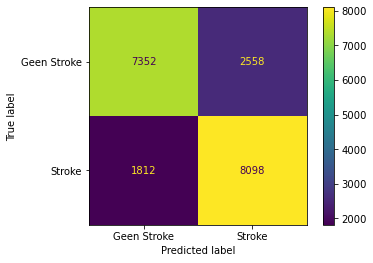

accuracy is 0.7795156407669022
precision is 0.7599474474474475
recall is 0.81715438950555
f1-score is 0.787513371584168


In [33]:
#aanmaken van de confusionmatrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

#de formules om metrics te berekenen met confusionmatrix
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = ((TP + TN)/(TP + TN + FP + FN))
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1_score= 2*precision*recall/(precision + recall)

print('accuracy is',accuracy)
print('precision is',precision)
print('recall is',recall)
print('f1-score is',f1_score)

f1-score is voor deze vraagstuk het best maatstaf doordat, Wij hebben bij deze vraagstuk te maken met een imbalanced dataset hierbij is het belangrijk dat wij de nauwkeurigheid van het model goed hebben . Wij vinden dat beide precision en recall even belangrijk zijn. Zodat wij min mogelijk false negatives hebben, want anders verliezen we iemand. En zelfde voor false positives, anders gaat het zoveel mensen zomaar bang maken en naar de hospitaal gaan, alleen om te horen dat ze geen hartaanval hebben en geld hebben verspild. 

## Modeling

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

**UITLEG**

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

#### Gradient Boosted Decision Trees

#### XGBoost

### Self-assembled ensemble

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

## Conclusion & Advice

## Sources